# CS421: Introduction to Machine Learning
## Project: Customer Churn Prediction based on Customer Profile
### Exploratory Data Analysis
---

# 1. Setting up the notebook

### Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Import data

In [2]:
df = pd.read_csv("BankChurners.csv")
df = df.iloc[:, 1:21]
df.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

### Functions

In [3]:
def export_png(xlabel, ylabel, image_name):
    """
    Exports plots into png format

    INPUTS:
        xlabel — x axis name
        ylabel — y axis name
        image_name — File name for image with .png extension
    """
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.savefig(image_name, dpi=600, transparent=False, bbox_inches="tight")
    
    print("Export successful")

In [4]:
def categorical_probability(column):
    """
    Calculates probability distribution of Existing Customer and Attrited Customer

    INPUTS:
        columns — DataFrame of a particular categorical variable
    
    OUTPUT:
        DataFrame with p_existing, p_default for each sub-category, sorted in p_default descending order
    """
    column_df = pd.crosstab(index=df[column], 
                               columns=df["attrition_flag"],
                                margins=True)


    column_unique = df[column].unique()
    all_cols = np.append(column_unique, "col_total")
    column_df.index = all_cols
    column_df.columns = ["attrited","existing", "row_total"]
    
    column_df['p_existing'] = column_df['existing'] / column_df['row_total']

    column_df['p_attrited'] = column_df['attrited'] / column_df['row_total']
    column_df['p_attrited'] = column_df['p_attrited'].round(4)
    column_df_probability = pd.DataFrame( [column_df['p_attrited'], column_df['p_existing']], columns=column_df.index ).T
    column_df_probability.sort_values(by=['p_attrited'], ascending=False, inplace=True)
    column_df_probability.drop(labels=['col_total'], inplace=True)
#     column_df_probability.drop(labels=['p_existing'], axis=1, inplace=True)
    return column_df_probability[:15]

# 1. Basic Exploration

In [5]:
df.shape

(10127, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [7]:
# check if there's any null/empty values in dataset
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

### Standardise column names to small case

In [8]:
df.columns = ['attrition_flag', 'customer_age', 'gender', 'dependent_count',
       'education_level', 'marital_status', 'income_category', 'card_category',
       'months_on_book', 'total_relationship_count', 'months_inactive_12_month',
       'contacts_count_12_month', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_change_q4_q1', 'total_trans_amt',
       'total_trans_count', 'total_count_change_q4_q1', 'avg_utilization_ratio']

numerical = ['customer_age', 'dependent_count', 'months_on_book', 
             'total_relationship_count', 'months_inactive_12_month',
             'contacts_count_12_month', 'credit_limit', 'total_revolving_bal',
             'avg_open_to_buy', 'total_amt_change_q4_q1', 'total_trans_amt',
             'total_trans_count', 'total_count_change_q4_q1', 'avg_utilization_ratio']

categorical = ['attrition_flag', 'gender','education_level', 
                    'marital_status', 'income_category', 'card_category']

# 2. Exploring Numerical columns

### Plot distribution for numerical columns

array([[<AxesSubplot:title={'center':'customer_age'}>,
        <AxesSubplot:title={'center':'dependent_count'}>],
       [<AxesSubplot:title={'center':'months_on_book'}>,
        <AxesSubplot:title={'center':'total_relationship_count'}>],
       [<AxesSubplot:title={'center':'months_inactive_12_month'}>,
        <AxesSubplot:title={'center':'contacts_count_12_month'}>],
       [<AxesSubplot:title={'center':'credit_limit'}>,
        <AxesSubplot:title={'center':'total_revolving_bal'}>],
       [<AxesSubplot:title={'center':'avg_open_to_buy'}>,
        <AxesSubplot:title={'center':'total_amt_change_q4_q1'}>],
       [<AxesSubplot:title={'center':'total_trans_amt'}>,
        <AxesSubplot:title={'center':'total_trans_count'}>],
       [<AxesSubplot:title={'center':'total_count_change_q4_q1'}>,
        <AxesSubplot:title={'center':'avg_utilization_ratio'}>]],
      dtype=object)

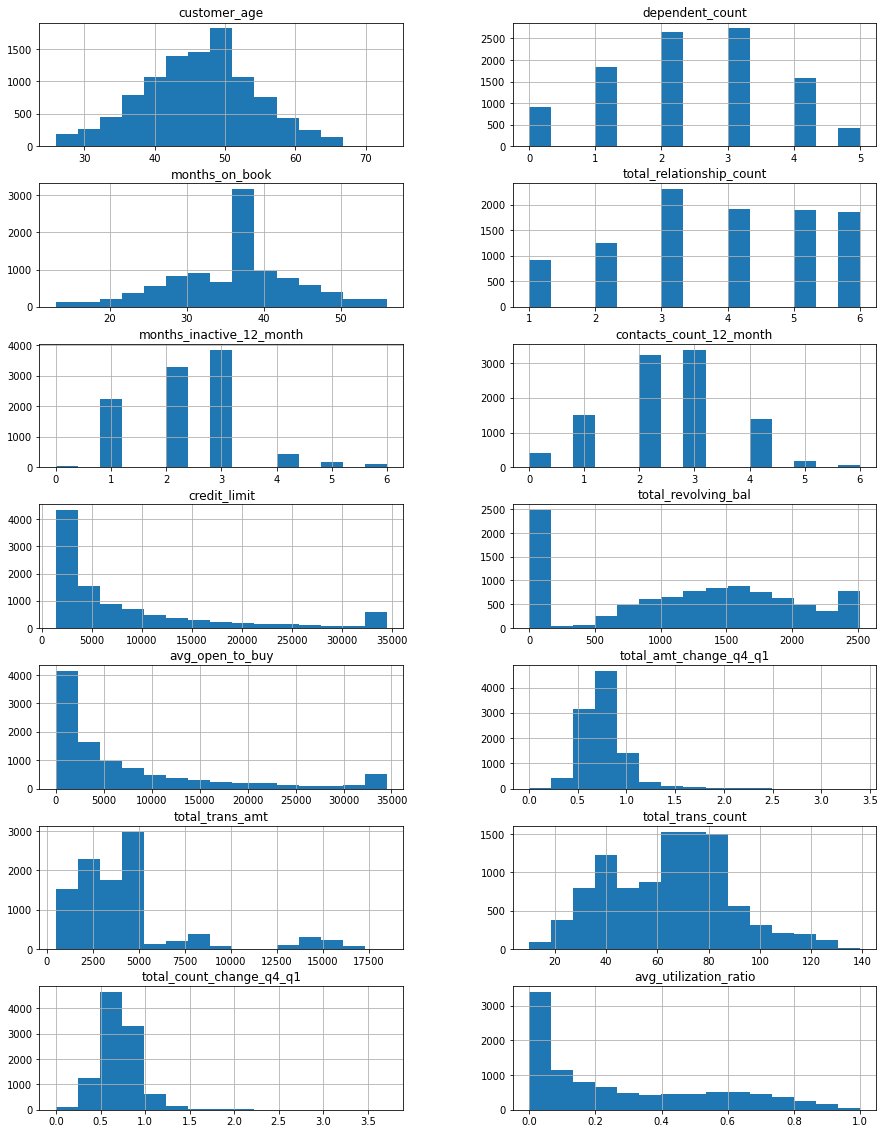

In [9]:
df[numerical].hist(bins=15, figsize=(15, 20), layout=(7,2))

In [10]:
# Retrieve name of skewed columns
skewed = []
for skew_val in df.skew():
    if skew_val > 1 or skew_val < -1:
        skewed.append( df.skew()[ df.skew() == skew_val ].index[0] )
        print( df.skew()[ df.skew() == skew_val ].index[0])
        print(round(skew_val, 3) )

credit_limit
1.667
avg_open_to_buy
1.662
total_amt_change_q4_q1
1.732
total_trans_amt
2.041
total_count_change_q4_q1
2.064


/var/folders/h8/zsl5znnn6m71b_clc0wvwl440000gn/T/ipykernel_16745/1995266435.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  for skew_val in df.skew():
/var/folders/h8/zsl5znnn6m71b_clc0wvwl440000gn/T/ipykernel_16745/1995266435.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewed.append( df.skew()[ df.skew() == skew_val ].index[0] )
/var/folders/h8/zsl5znnn6m71b_clc0wvwl440000gn/T/ipykernel_16745/1995266435.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print( df.skew()[ 

### Kernel density plots for numerical features

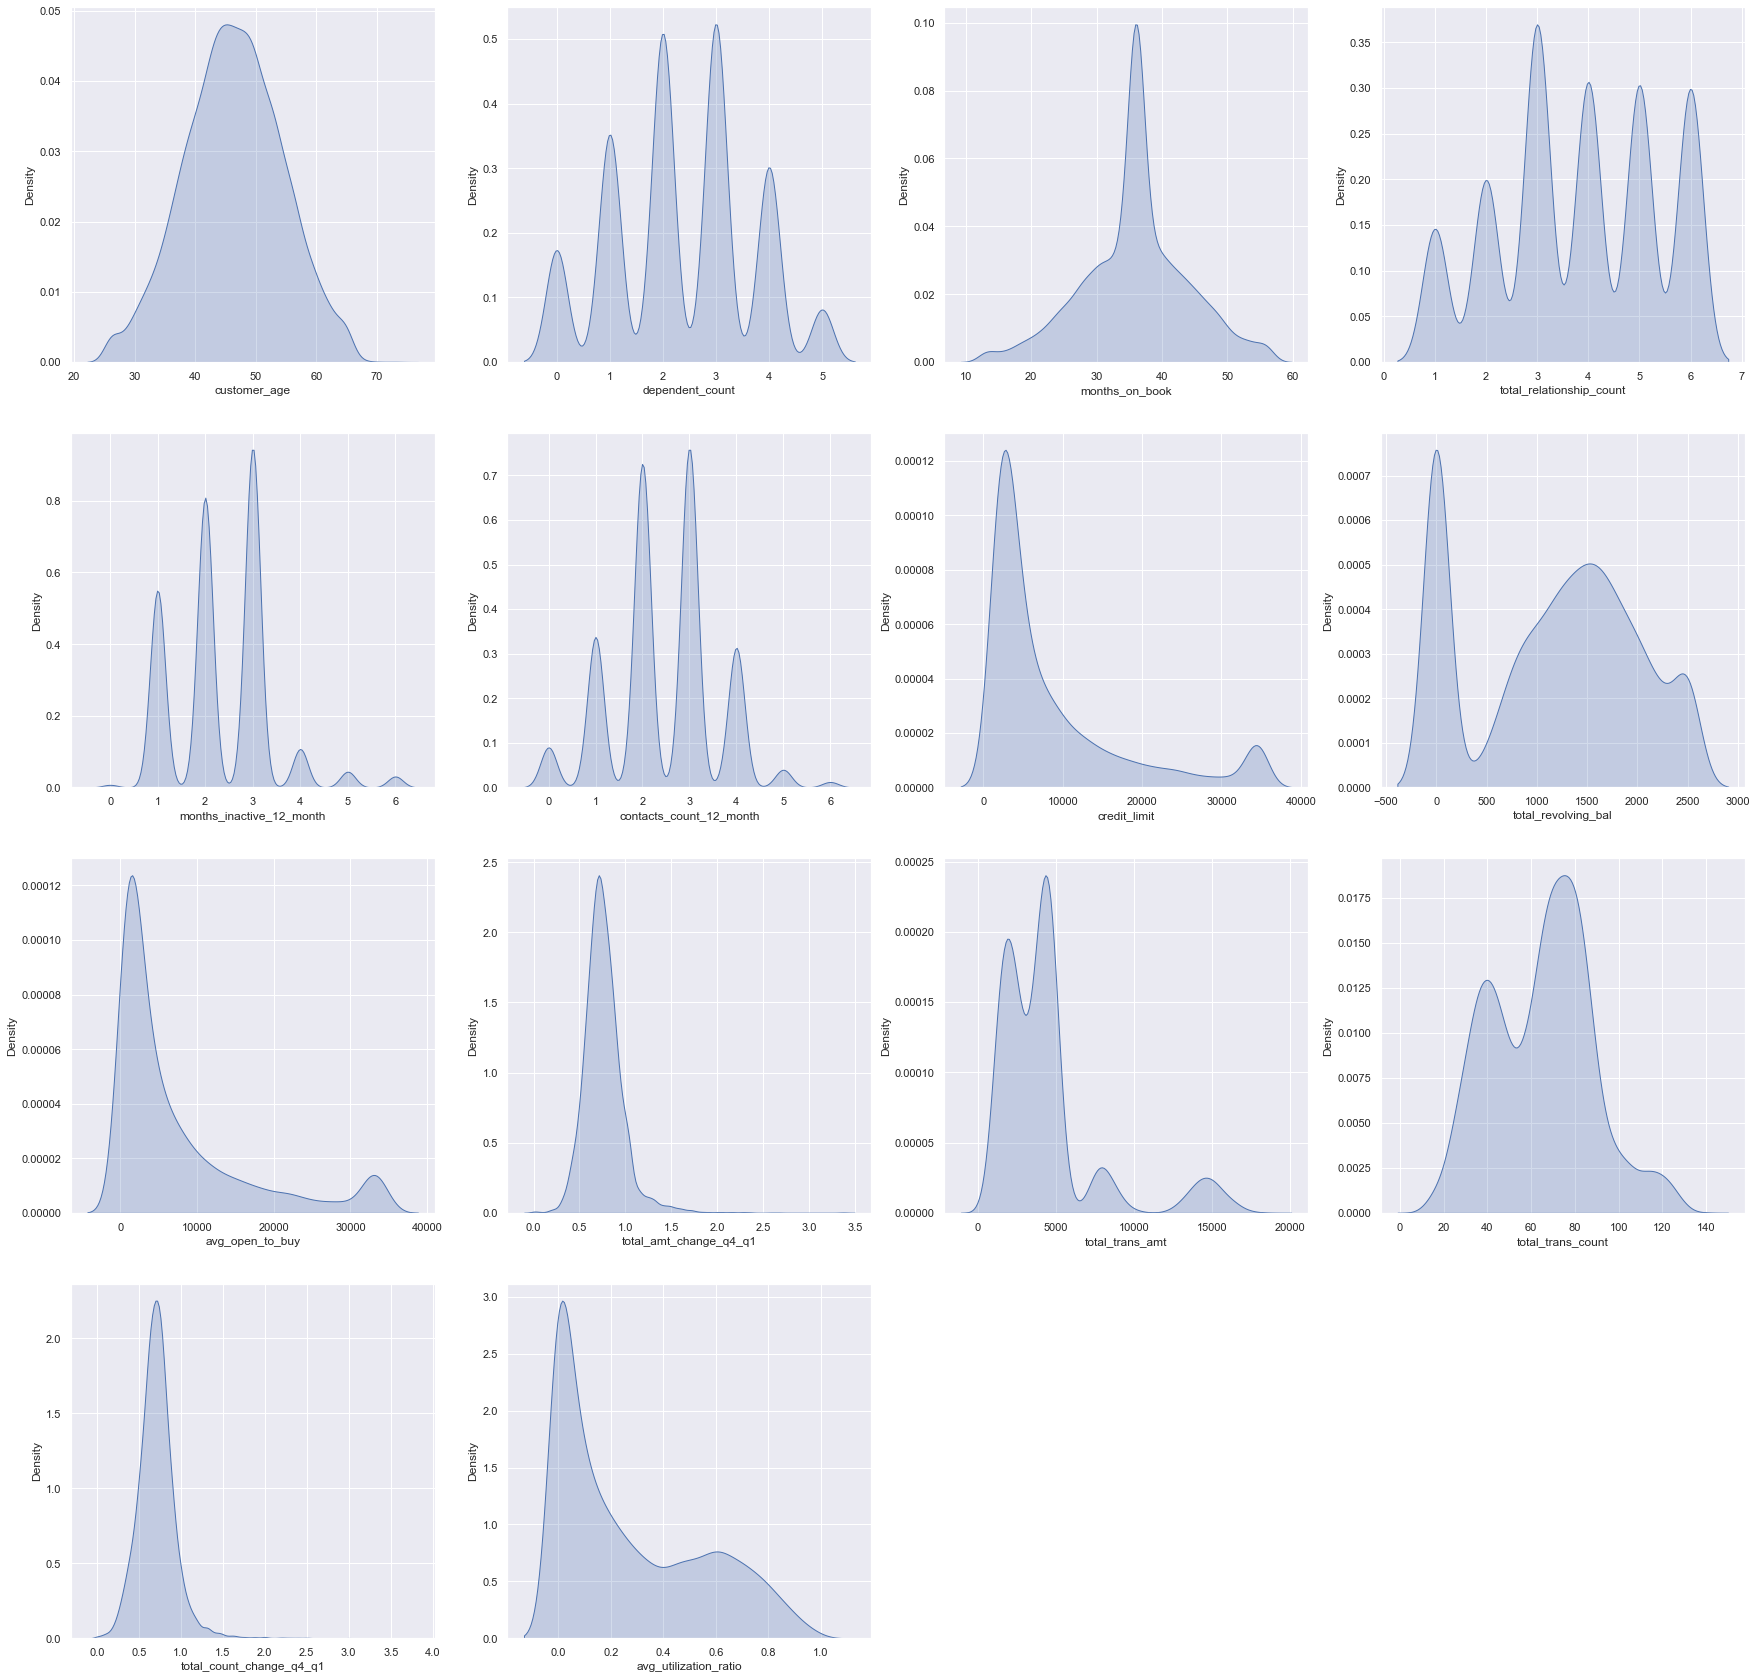

In [11]:
sns.set(rc={'figure.figsize': (30, 30)})
for i in range(len(numerical)):
    plt.subplot(4, 4, i + 1)
    sns.kdeplot(df[numerical[i]], shade=True)

### Check for collinearity

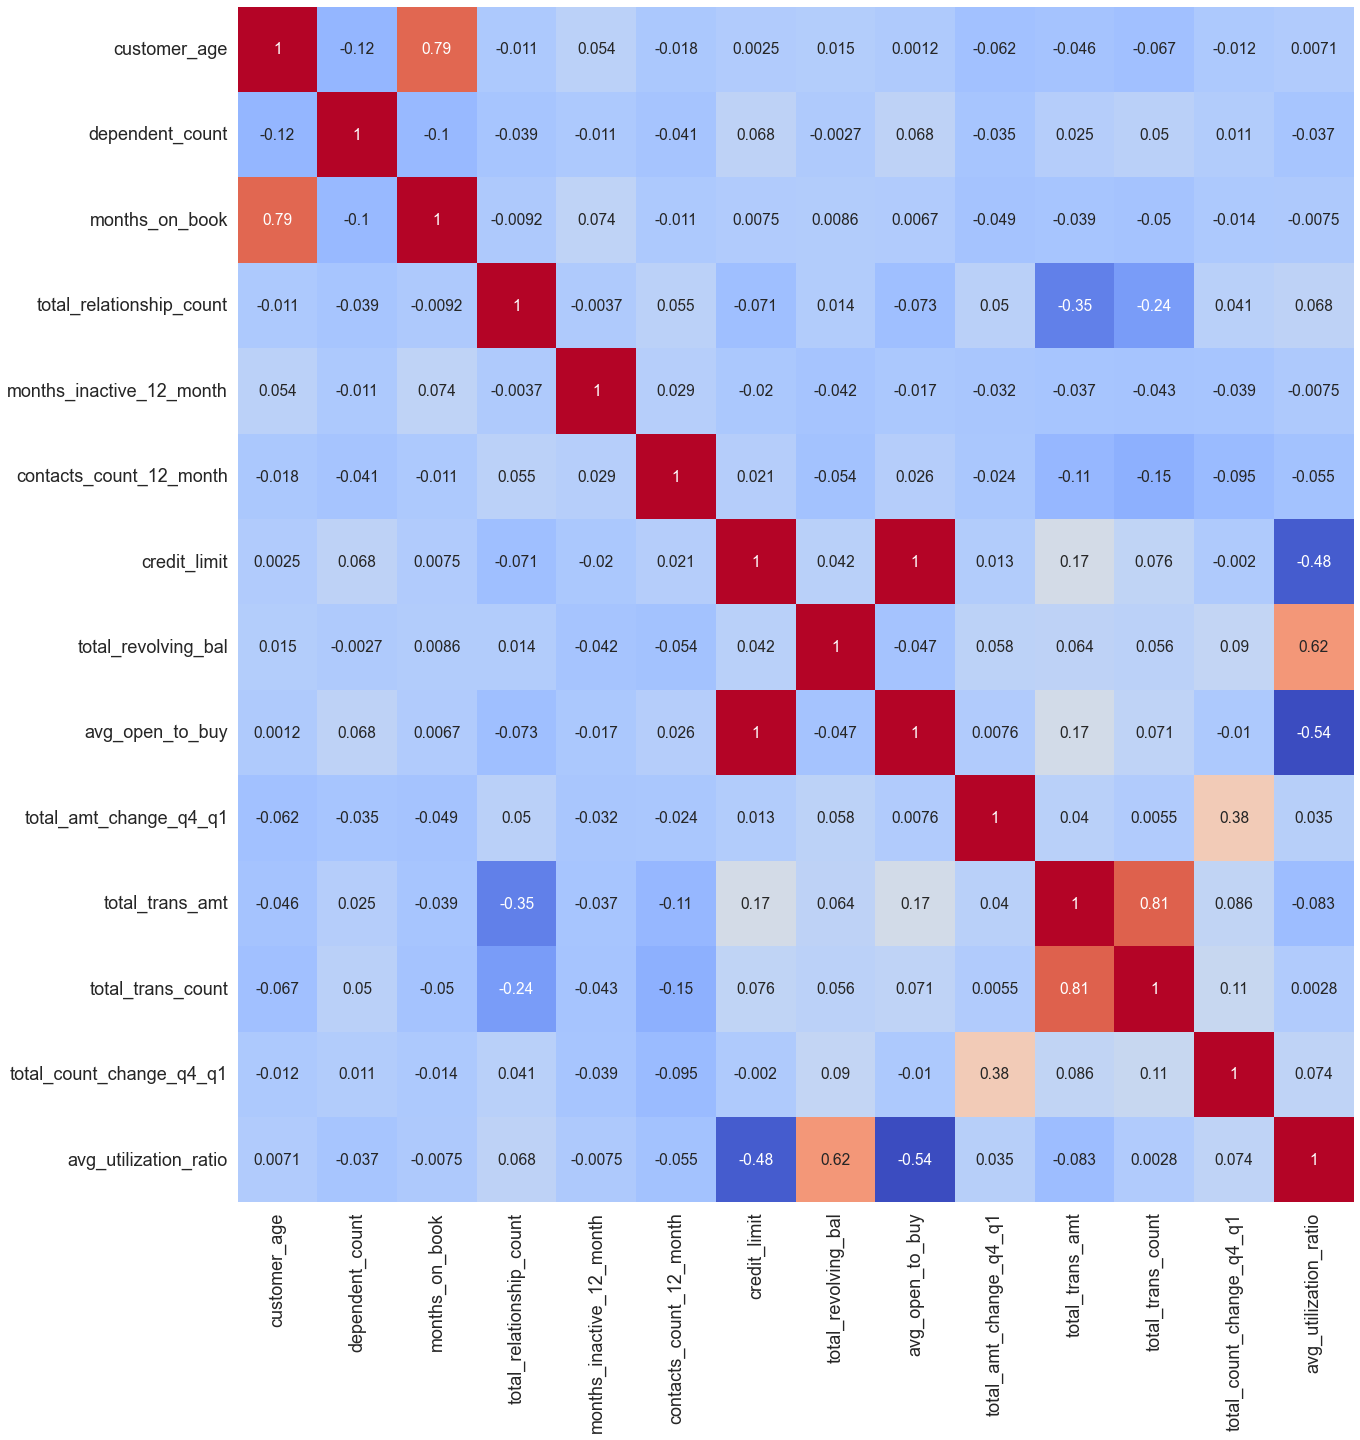

In [12]:
fig, ax = plt.subplots( figsize = (20,22) )
res = sns.heatmap( df.corr(), cmap='coolwarm', annot=True, ax = ax, annot_kws={"size": 15.5}, cbar=False)
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 18, rotation=90)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 18)

plt.savefig("correlation_matrix_heatmap.png", transparent=False, dpi=500)
plt.show()

In [13]:
# Plot dataframe for collinear features
results = df.corr()[ (df.corr() > 0.2) & (df.corr() != 1) ]

results

customer_age  dependent_count  months_on_book  \
customer_age                       NaN              NaN        0.788912   
dependent_count                    NaN              NaN             NaN   
months_on_book                0.788912              NaN             NaN   
total_relationship_count           NaN              NaN             NaN   
months_inactive_12_month           NaN              NaN             NaN   
contacts_count_12_month            NaN              NaN             NaN   
credit_limit                       NaN              NaN             NaN   
total_revolving_bal                NaN              NaN             NaN   
avg_open_to_buy                    NaN              NaN             NaN   
total_amt_change_q4_q1             NaN              NaN             NaN   
total_trans_amt                    NaN              NaN             NaN   
total_trans_count                  NaN              NaN             NaN   
total_count_change_q4_q1           NaN              NaN             NaN   
avg_utilization_ratio              NaN              NaN             NaN   

                          total_relationship_count  months_inactive_12_month  \
customer_age                                   NaN                       NaN   
dependent_count                                NaN                       NaN   
months_on_book                                 NaN                       NaN   
total_relationship_count                       NaN                       NaN   
months_inactive_12_month                       NaN                       NaN   
contacts_count_12_month                        NaN                       NaN   
credit_limit                                   NaN                       NaN   
total_revolving_bal                            NaN                       NaN   
avg_open_to_buy                                NaN                       NaN   
total_amt_change_q4_q1                         NaN                       NaN   
total_trans_amt                                NaN                       NaN   
total_trans_count                              NaN                       NaN   
total_count_change_q4_q1                       NaN                       NaN   
avg_utilization_ratio                          NaN                       NaN   

                          contacts_count_12_month  credit_limit  \
customer_age                                  NaN           NaN   
dependent_count                               NaN           NaN   
months_on_book                                NaN           NaN   
total_relationship_count                      NaN           NaN   
months_inactive_12_month                      NaN           NaN   
contacts_count_12_month                       NaN           NaN   
credit_limit                                  NaN           NaN   
total_revolving_bal                           NaN           NaN   
avg_open_to_buy                               NaN      0.995981   
total_amt_change_q4_q1                        NaN           NaN   
total_trans_amt                               NaN           NaN   
total_trans_count                             NaN           NaN   
total_count_change_q4_q1                      NaN           NaN   
avg_utilization_ratio                         NaN           NaN   

                          total_revolving_bal  avg_open_to_buy  \
customer_age                              NaN              NaN   
dependent_count                           NaN              NaN   
months_on_book                            NaN              NaN   
total_relationship_count                  NaN              NaN   
months_inactive_12_month                  NaN              NaN   
contacts_count_12_month                   NaN              NaN   
credit_limit                              NaN         0.995981   
total_revolving_bal                       NaN              NaN   
avg_open_to_buy                           NaN              NaN   
total_amt_change_q4_q1           

### Plotting pairwise scatterplots

<Figure size 1440x1440 with 0 Axes>

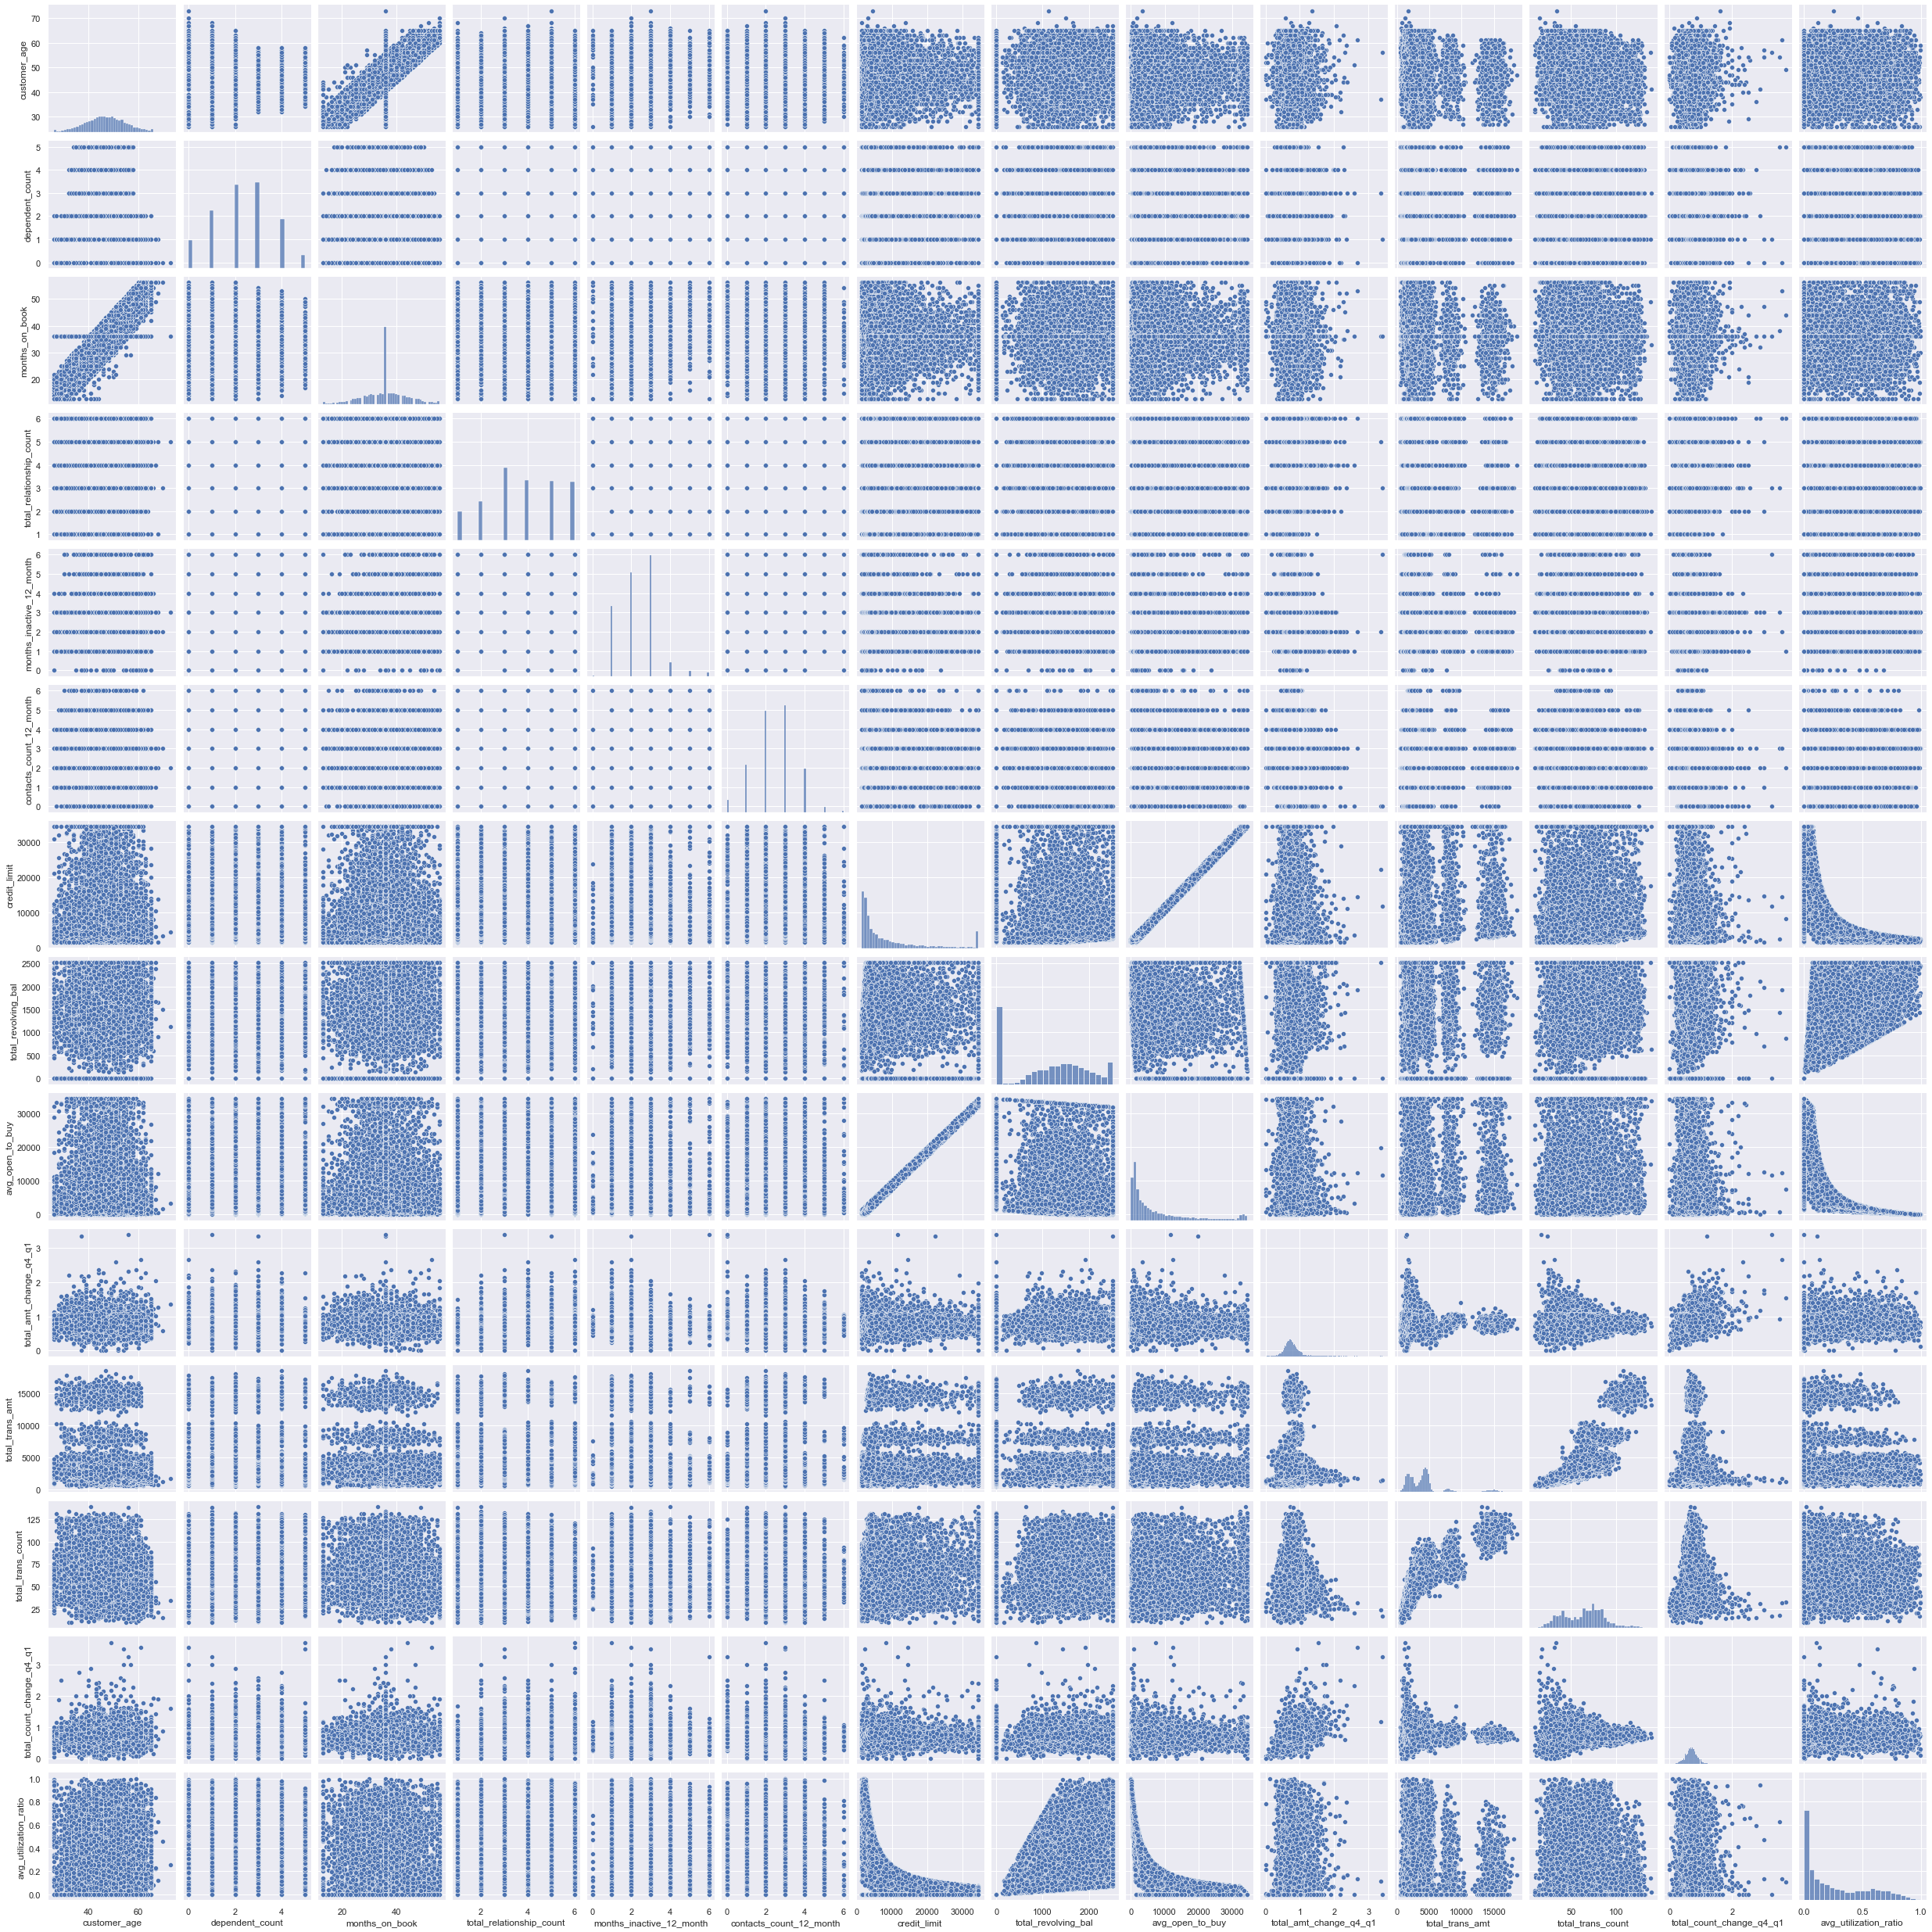

In [14]:
plt.figure(figsize=(20, 20))

test = sns.pairplot(df[numerical])
test.savefig('pairplots-dpi400.png', dpi=400, bbox_inches="tight")
# test.set_xticklabels(test.get_xmajorticklabels(), fontsize = 18, rotation=90)
# test.set_yticklabels(test.get_ymajorticklabels(), fontsize = 18)

# plt.show()

### Closer look at collinear featuers

<AxesSubplot:xlabel='credit_limit', ylabel='avg_open_to_buy'>

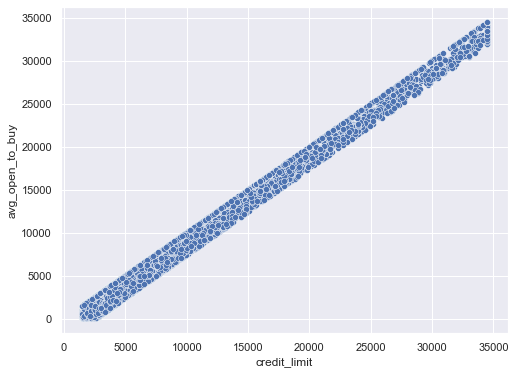

In [15]:
# Correlation: 1
fig, ax = plt.subplots( figsize = (8,6) )
sns.scatterplot(x='credit_limit', y='avg_open_to_buy', data = df)

# export_png('credit_limit','avg_open_to_buy', 'corr1.png')

<AxesSubplot:xlabel='total_trans_amt', ylabel='total_trans_count'>

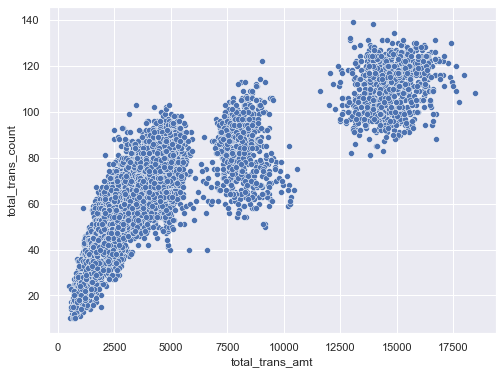

In [16]:
# Correlation: 0.81
fig, ax = plt.subplots( figsize = (8,6) )
sns.scatterplot(x='total_trans_amt', y='total_trans_count', data = df)

# export_png('total_trans_amt','total_trans_count', 'corr2.png')

<AxesSubplot:xlabel='customer_age', ylabel='months_on_book'>

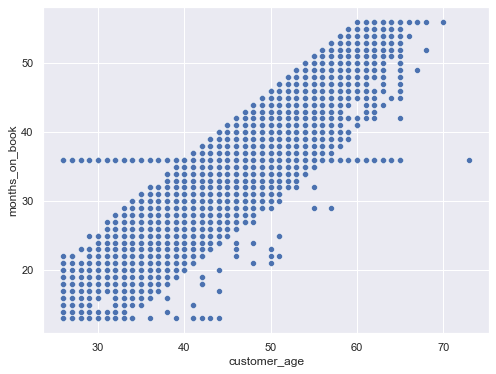

In [17]:
# Correlation: 0.79
fig, ax = plt.subplots( figsize = (8,6) )
sns.scatterplot(x='customer_age', y='months_on_book', data = df)

# export_png('customer_age','months_on_book', 'corr3.png')

<AxesSubplot:xlabel='total_revolving_bal', ylabel='avg_utilization_ratio'>

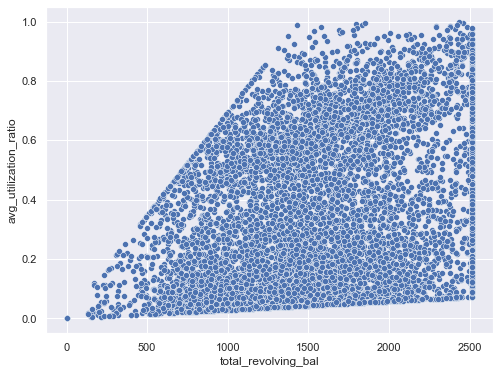

In [18]:
# Correlation: 0.62
fig, ax = plt.subplots( figsize = (8,6) )
sns.scatterplot(x='total_revolving_bal', y='avg_utilization_ratio', data = df)

# export_png('total_revolving_bal','avg_utilization_ratio', 'corr4.png')

<AxesSubplot:xlabel='avg_open_to_buy', ylabel='avg_utilization_ratio'>

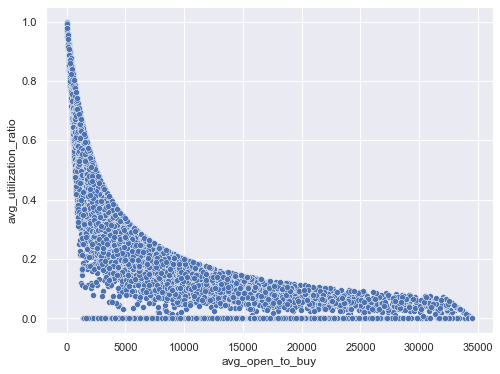

In [19]:
# Correlation: -0.54
fig, ax = plt.subplots( figsize = (8,6) )
sns.scatterplot(x='avg_open_to_buy', y='avg_utilization_ratio', data = df)

# export_png('avg_open_to_buy','avg_utilization_ratio', 'corr5.png')

<AxesSubplot:xlabel='credit_limit', ylabel='avg_utilization_ratio'>

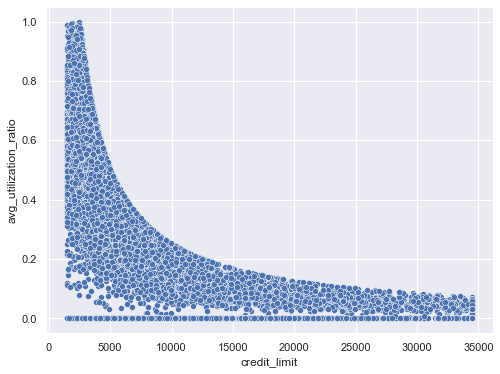

In [20]:
# Correlation: -0.48
fig, ax = plt.subplots( figsize = (8,6) )
sns.scatterplot(x='credit_limit', y='avg_utilization_ratio', data = df)

# export_png('credit_limit','avg_utilization_ratio', 'corr6.png')

<AxesSubplot:xlabel='total_amt_change_q4_q1', ylabel='total_count_change_q4_q1'>

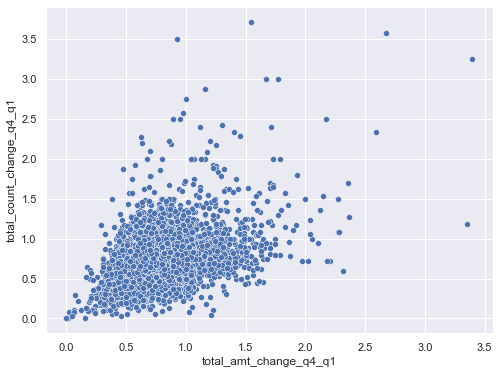

In [21]:
# Correlation: 0.38
fig, ax = plt.subplots( figsize = (8,6) )
sns.scatterplot(x='total_amt_change_q4_q1', y='total_count_change_q4_q1', data = df)

# export_png('total_amt_change_q4_q1','total_count_change_q4_q1', 'corr7.png')

Some findings:
1. High correlation (direct) — `total_trans_amt` and `total_trans_count`
2. High correlation (direct) — `customer_age` and `months_on_book`
3. High correlation (direct) `total_revolving_bal` and `avg_utilization_ratio`
4. Moderate correlation (inverse) — `credit_limit` and `avg_utilization_ratio`
5. Moderate correlation (inverse) — `avg_open_to_buy` and `avg_utilization_ratio`
6. Moderate correlation (direct) — `total_count_change_q4_q1` and `total_amt_change_q4_q1`
7. Moderate correlation (indirect) — `total_trans_amt` and `total_relationship_count`
8. Moderate correlation (indirect) — `total_trans_count` and `total_relationship_count`

# 3. Exploring Categorical Features

### Display value_counts for each categorical column

In [23]:
for cat in categorical:
    print('Variable:', cat)
    print('Unique values:', df[cat].nunique() )
    print( df[cat].value_counts() )
    print()

Variable: attrition_flag
Unique values: 2
Existing Customer    8500
Attrited Customer    1627
Name: attrition_flag, dtype: int64

Variable: gender
Unique values: 2
F    5358
M    4769
Name: gender, dtype: int64

Variable: education_level
Unique values: 7
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: education_level, dtype: int64

Variable: marital_status
Unique values: 4
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: marital_status, dtype: int64

Variable: income_category
Unique values: 6
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: income_category, dtype: int64

Variable: card_category
Unique values: 4
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: card_category, dtype: int64



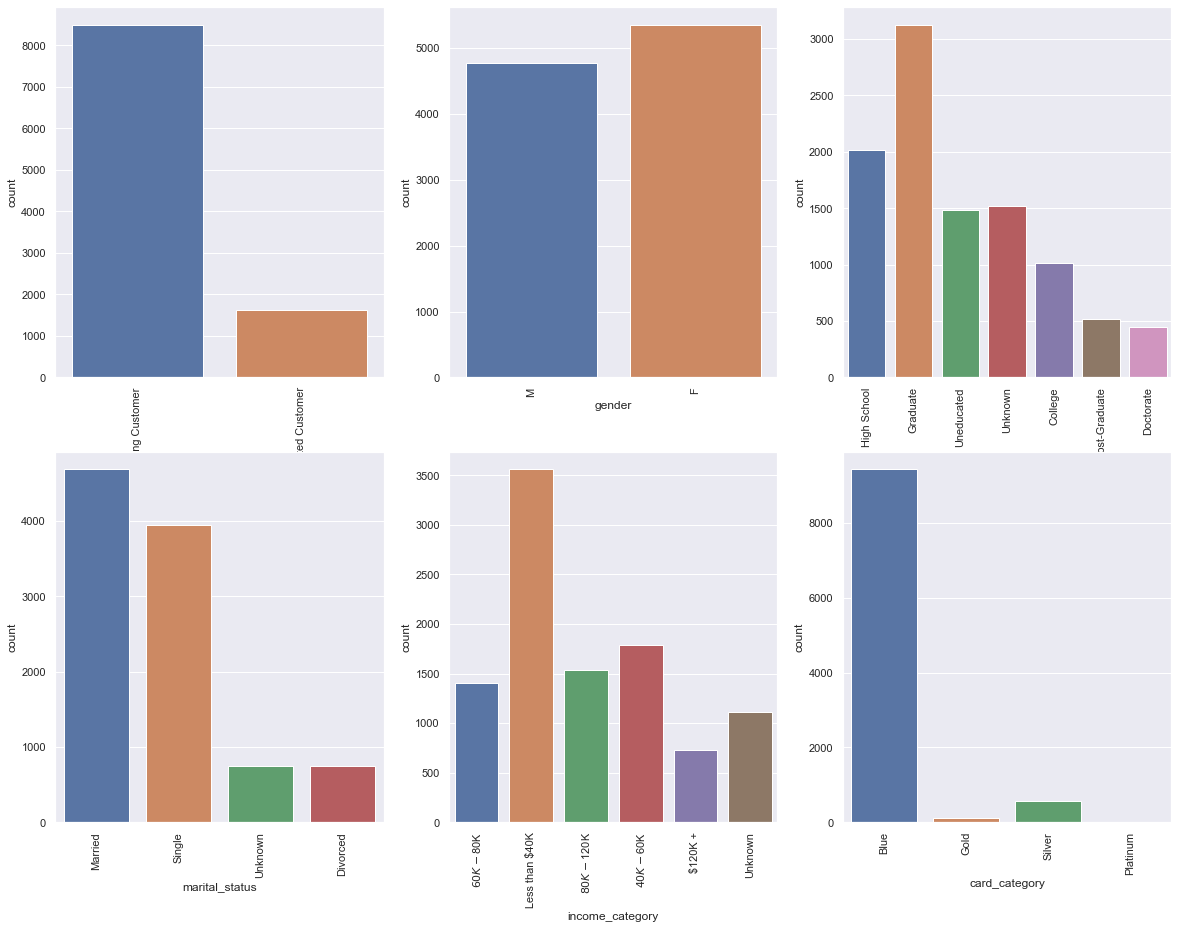

In [24]:
# Plot histogram
fig, ax = plt.subplots(2, 3, figsize=(20, 15))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(x=df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

# 4. Bivariate plots

### Boxplot for attrition_flag against each numerical column

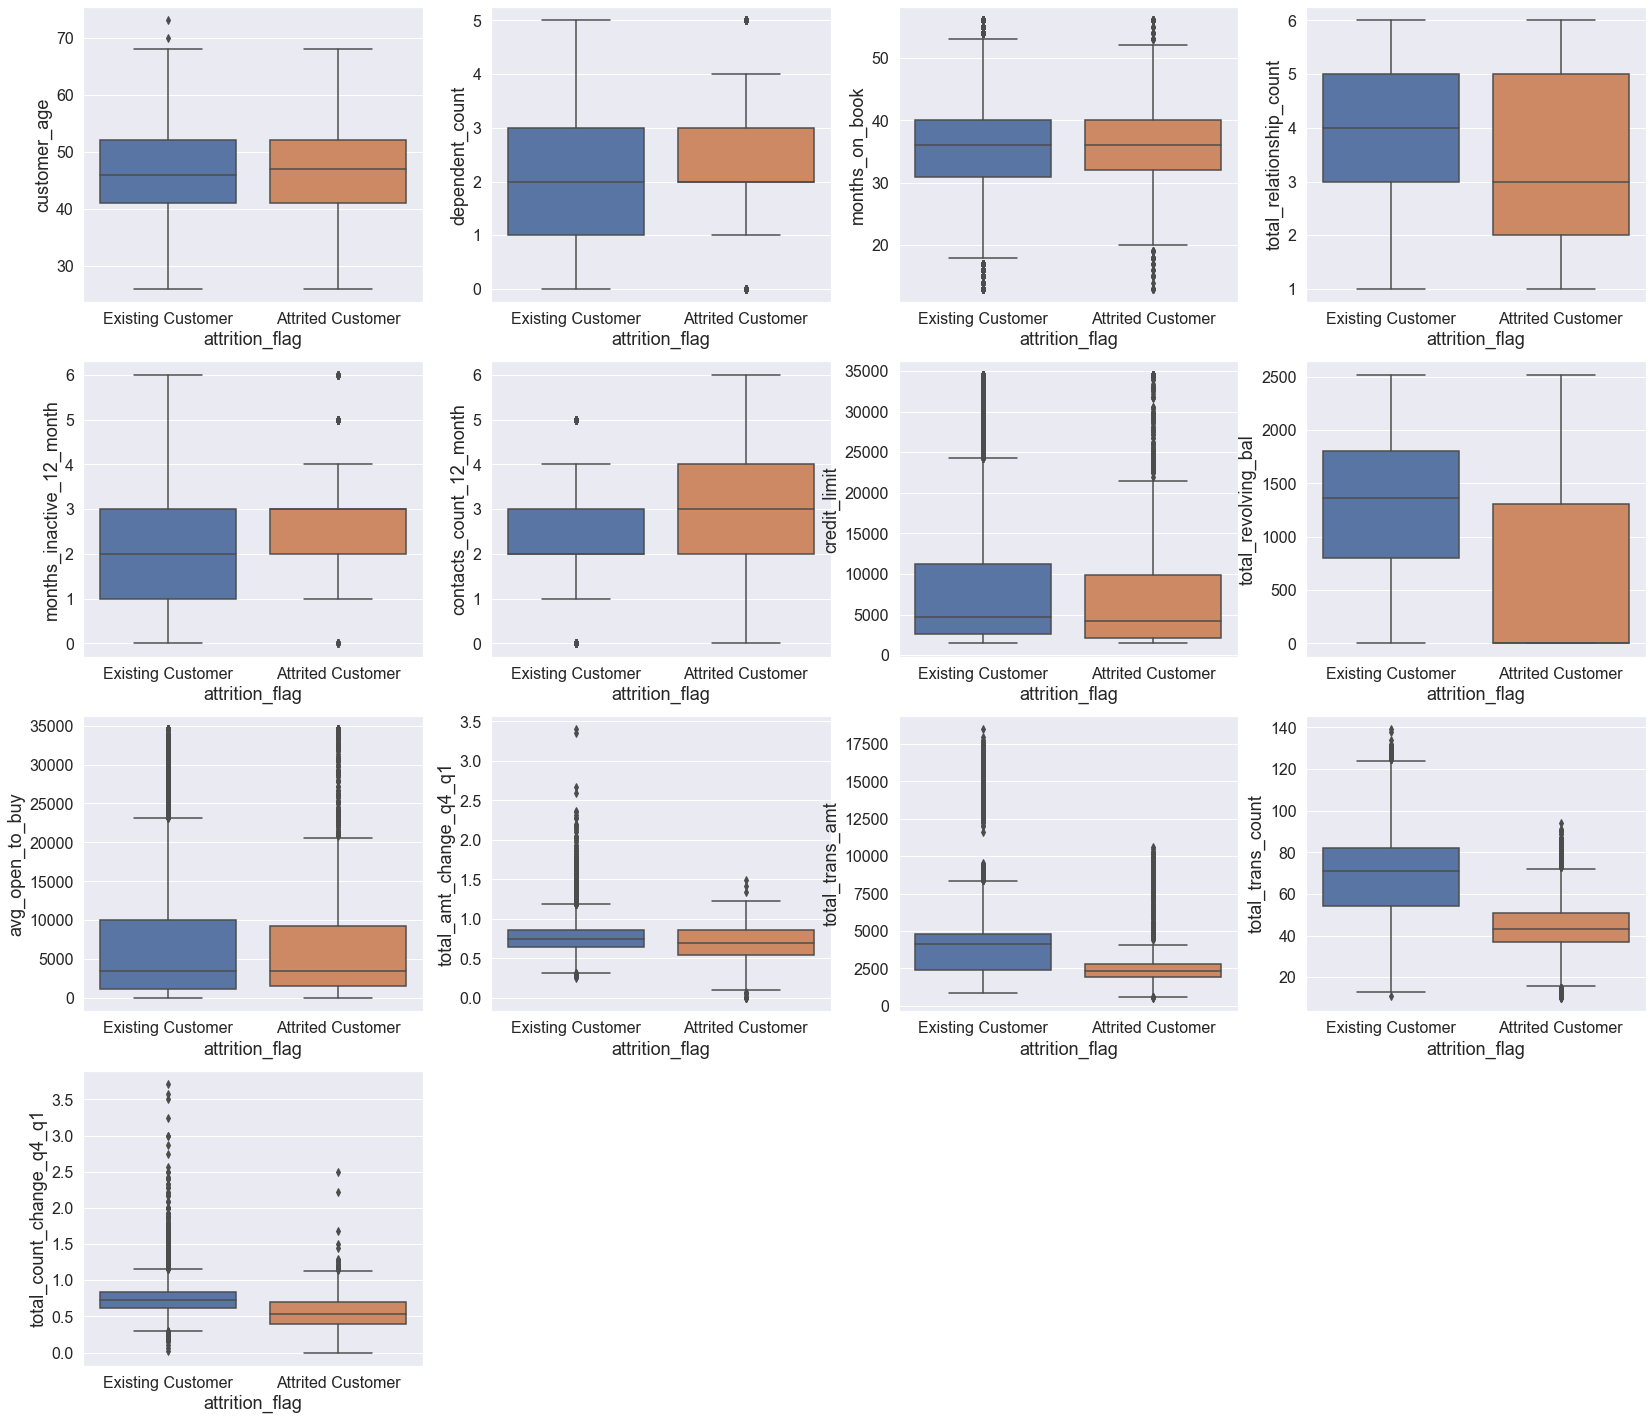

In [25]:
plt.figure(figsize=(28, 25))
for i in range(len(numerical) - 1):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x='attrition_flag', y=numerical[i], data=df)
    plt.xlabel('attrition_flag', fontsize=18)
    plt.ylabel(numerical[i], fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    

plt.show()

<AxesSubplot:xlabel='attrition_flag', ylabel='months_inactive_12_month'>

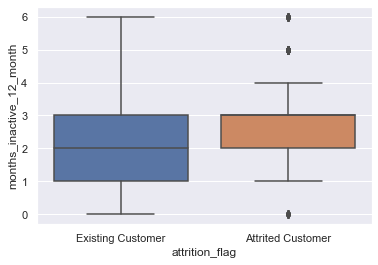

In [26]:
# Taking a closer look at the boxplots
x = df['attrition_flag']
y = df['months_inactive_12_month']

fig, ax = plt.subplots( figsize = (6,4) )
sns.boxplot(x=x, y=y)

# export_png('attrition_flag', 'months_inactive_12_month', 'attrition_monthsinactive.png')

### Calculate Probability Distribution for Existing and Attrited Customers for each categorical columns

In [30]:
import dataframe_image as dfi
pd.options.display.precision = 4
pd.set_option('display.precision', 4)

for cat in categorical[1:]:
    print(cat)
    table = categorical_probability(cat)
    cm = sns.color_palette("crest", as_cmap=True)
    styled_table = table.style.background_gradient(cmap=cm)
    display(styled_table)
    
#    # Export DataFrame as image
#     name = cat + '.png'
#     dfi.export(styled_table, name)

gender


education_level


marital_status


income_category


card_category


# 5. Multivariate Plots

In [35]:
### 3D Boxplots of categorical columns against numerical columns across attrition_flag

<AxesSubplot:xlabel='card_category', ylabel='total_revolving_bal'>

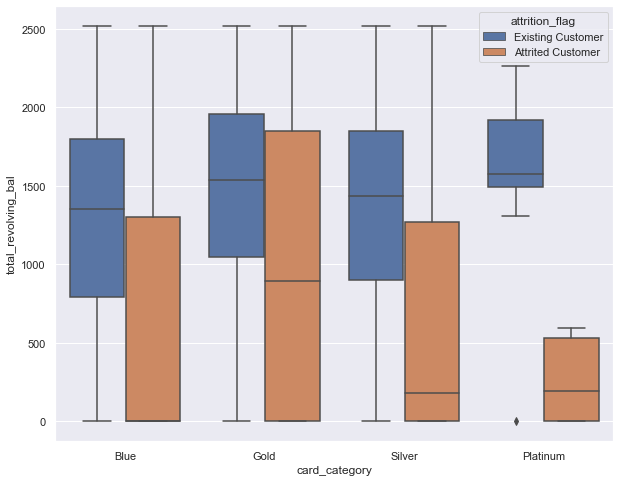

In [31]:
# Total revolving balance across card_categories

fig, ax = plt.subplots( figsize = (10,8) )
sns.boxplot(x = 'card_category', y='total_revolving_bal', hue='attrition_flag', data = df)

# export_png('card_category', 'total_revolving_bal', 'card_v_revolvingbal.png')

<AxesSubplot:xlabel='card_category', ylabel='contacts_count_12_month'>

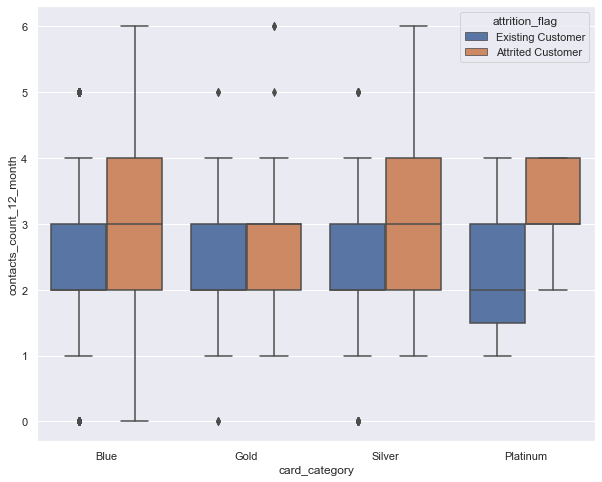

In [32]:
# Those who called the bank more times have a higher chance of attrition

fig, ax = plt.subplots( figsize = (10,8) )
sns.boxplot(x = 'card_category', y='contacts_count_12_month', hue='attrition_flag', data = df)

<AxesSubplot:xlabel='card_category', ylabel='total_trans_count'>

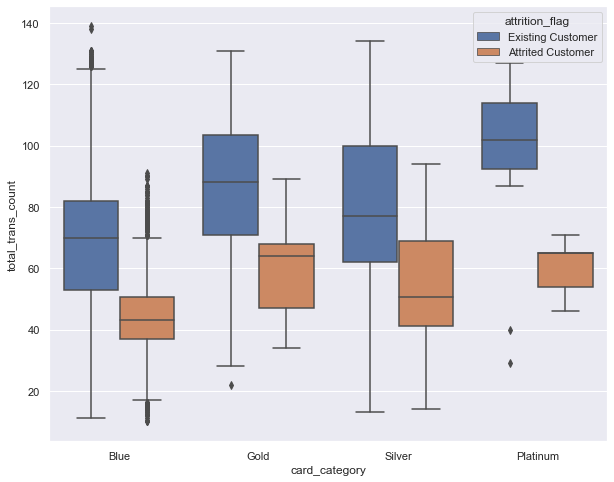

In [33]:
# Those who spent less on their card has a lower chance of attrition

fig, ax = plt.subplots( figsize = (10,8) )
sns.boxplot(x = 'card_category', y='total_trans_count', hue='attrition_flag', data = df)

# export_png('marital_status', 'total_trans_count', 'marital_v_transcount.png')

<AxesSubplot:xlabel='income_category', ylabel='total_revolving_bal'>

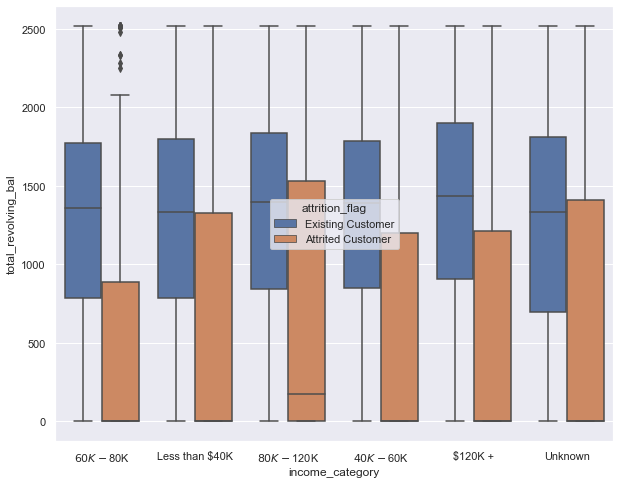

In [34]:
fig, ax = plt.subplots( figsize = (10,8) )
sns.boxplot(x = 'income_category', y='total_revolving_bal', hue='attrition_flag', data = df)

# export_png('marital_status', 'total_trans_count', 'marital_v_transcount.png')
